# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import skew

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"varenzowie","key":"9ed61cf6691e526f07d4ed45cdf945cb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download valakhorasani/bank-transaction-dataset-for-fraud-detection

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
License(s): apache-2.0


In [ ]:
!mkdir bank-transaction-dataset-for-fraud-detection
!unzip bank-transaction-dataset-for-fraud-detection -d bank-transaction-dataset-for-fraud-detection

Archive:  bank-transaction-dataset-for-fraud-detection.zip
  inflating: bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv  


In [ ]:
df = pd.read_csv('bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

In [ ]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Untuk setiap kolom, tipe datanya sudah tepat, kecuali TransactionDate  dan PreviousTransactionDate yang seharusnya bertipe DateTime

In [ ]:
df.Channel.value_counts()

,count
Channel,
Branch,868
ATM,833
Online,811


In [ ]:
df.CustomerOccupation.value_counts()

,count
CustomerOccupation,
Student,657
Doctor,631
Engineer,625
Retired,599


In [ ]:
num_cols_df = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols_df = df.select_dtypes(include=['object', 'category']).columns
print(f'Kolom Numerik: {num_cols_df}')
print(f'Kolom Kategori: {cat_cols_df}')

Kolom Numerik: Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')
Kolom Kategori: Index(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerOccupation', 'PreviousTransactionDate'],
      dtype='object')


## Menangani Data yang Hilang dan duplikat


In [ ]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Analisis Distribusi dan Korelasi

In [ ]:
valid_num_cols = [col for col in num_cols_df if col in df.columns]
corr_matrix = df[valid_num_cols].corr()
print(corr_matrix)


                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


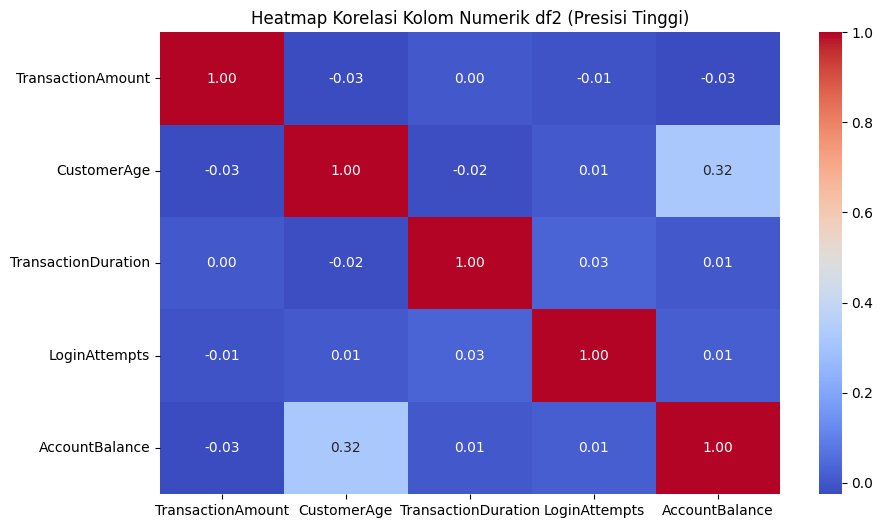

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Kolom Numerik df2 (Presisi Tinggi)')
plt.show()

## Visualisasi Data

<ipython-input-17-bac137770a48>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skew_df, x='Skewness', y='Feature', palette='viridis')


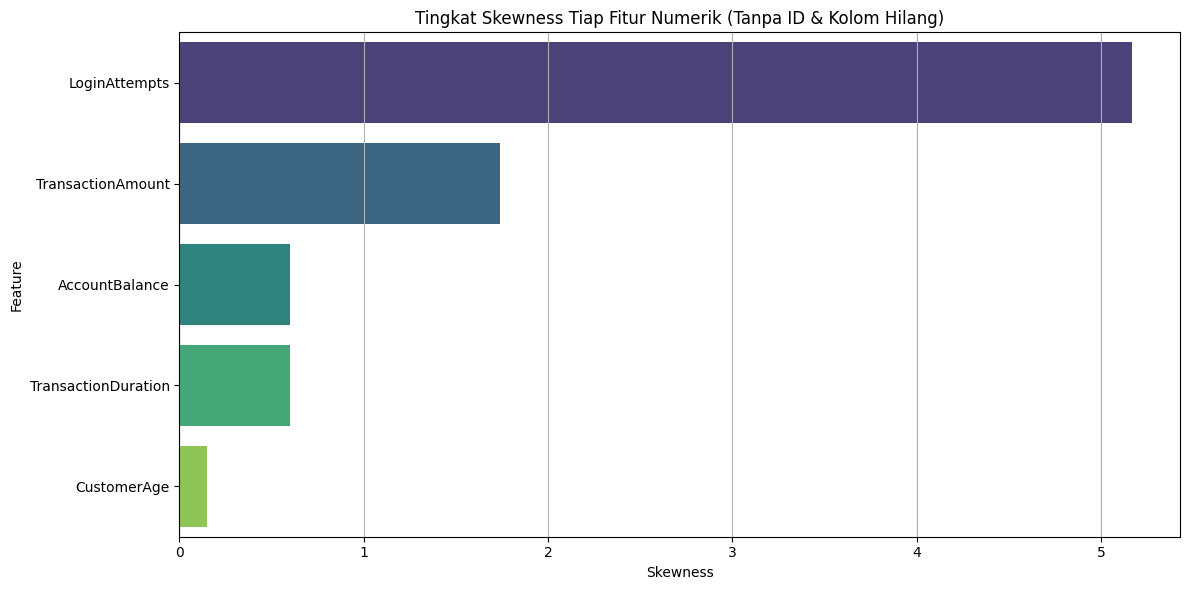

,Feature,Skewness
0,LoginAttempts,5.170401
1,TransactionAmount,1.739067
2,AccountBalance,0.600842
3,TransactionDuration,0.599074
4,CustomerAge,0.147776


In [ ]:
valid_num_cols = [col for col in num_cols_df if col in df.columns and col != 'ID']

skew_values = df[valid_num_cols].apply(skew).sort_values(key=abs, ascending=False)
skew_df = pd.DataFrame({'Feature': skew_values.index, 'Skewness': skew_values.values})

plt.figure(figsize=(12, 6))
sns.barplot(data=skew_df, x='Skewness', y='Feature', palette='viridis')
plt.title('Tingkat Skewness Tiap Fitur Numerik (Tanpa ID & Kolom Hilang)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

skew_df.head(10)


<ipython-input-18-28a4341d9ae1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Location'].isin(top_locations)], x='Location', order=top_locations, palette='viridis', ax=axes[0, 0])
<ipython-input-18-28a4341d9ae1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CustomerOccupation', y='TransactionAmount', estimator='mean', palette='coolwarm', ax=axes[0, 1])
<ipython-input-18-28a4341d9ae1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Channel', y='TransactionAmount', palette='Set3', ax=axes[2, 1])


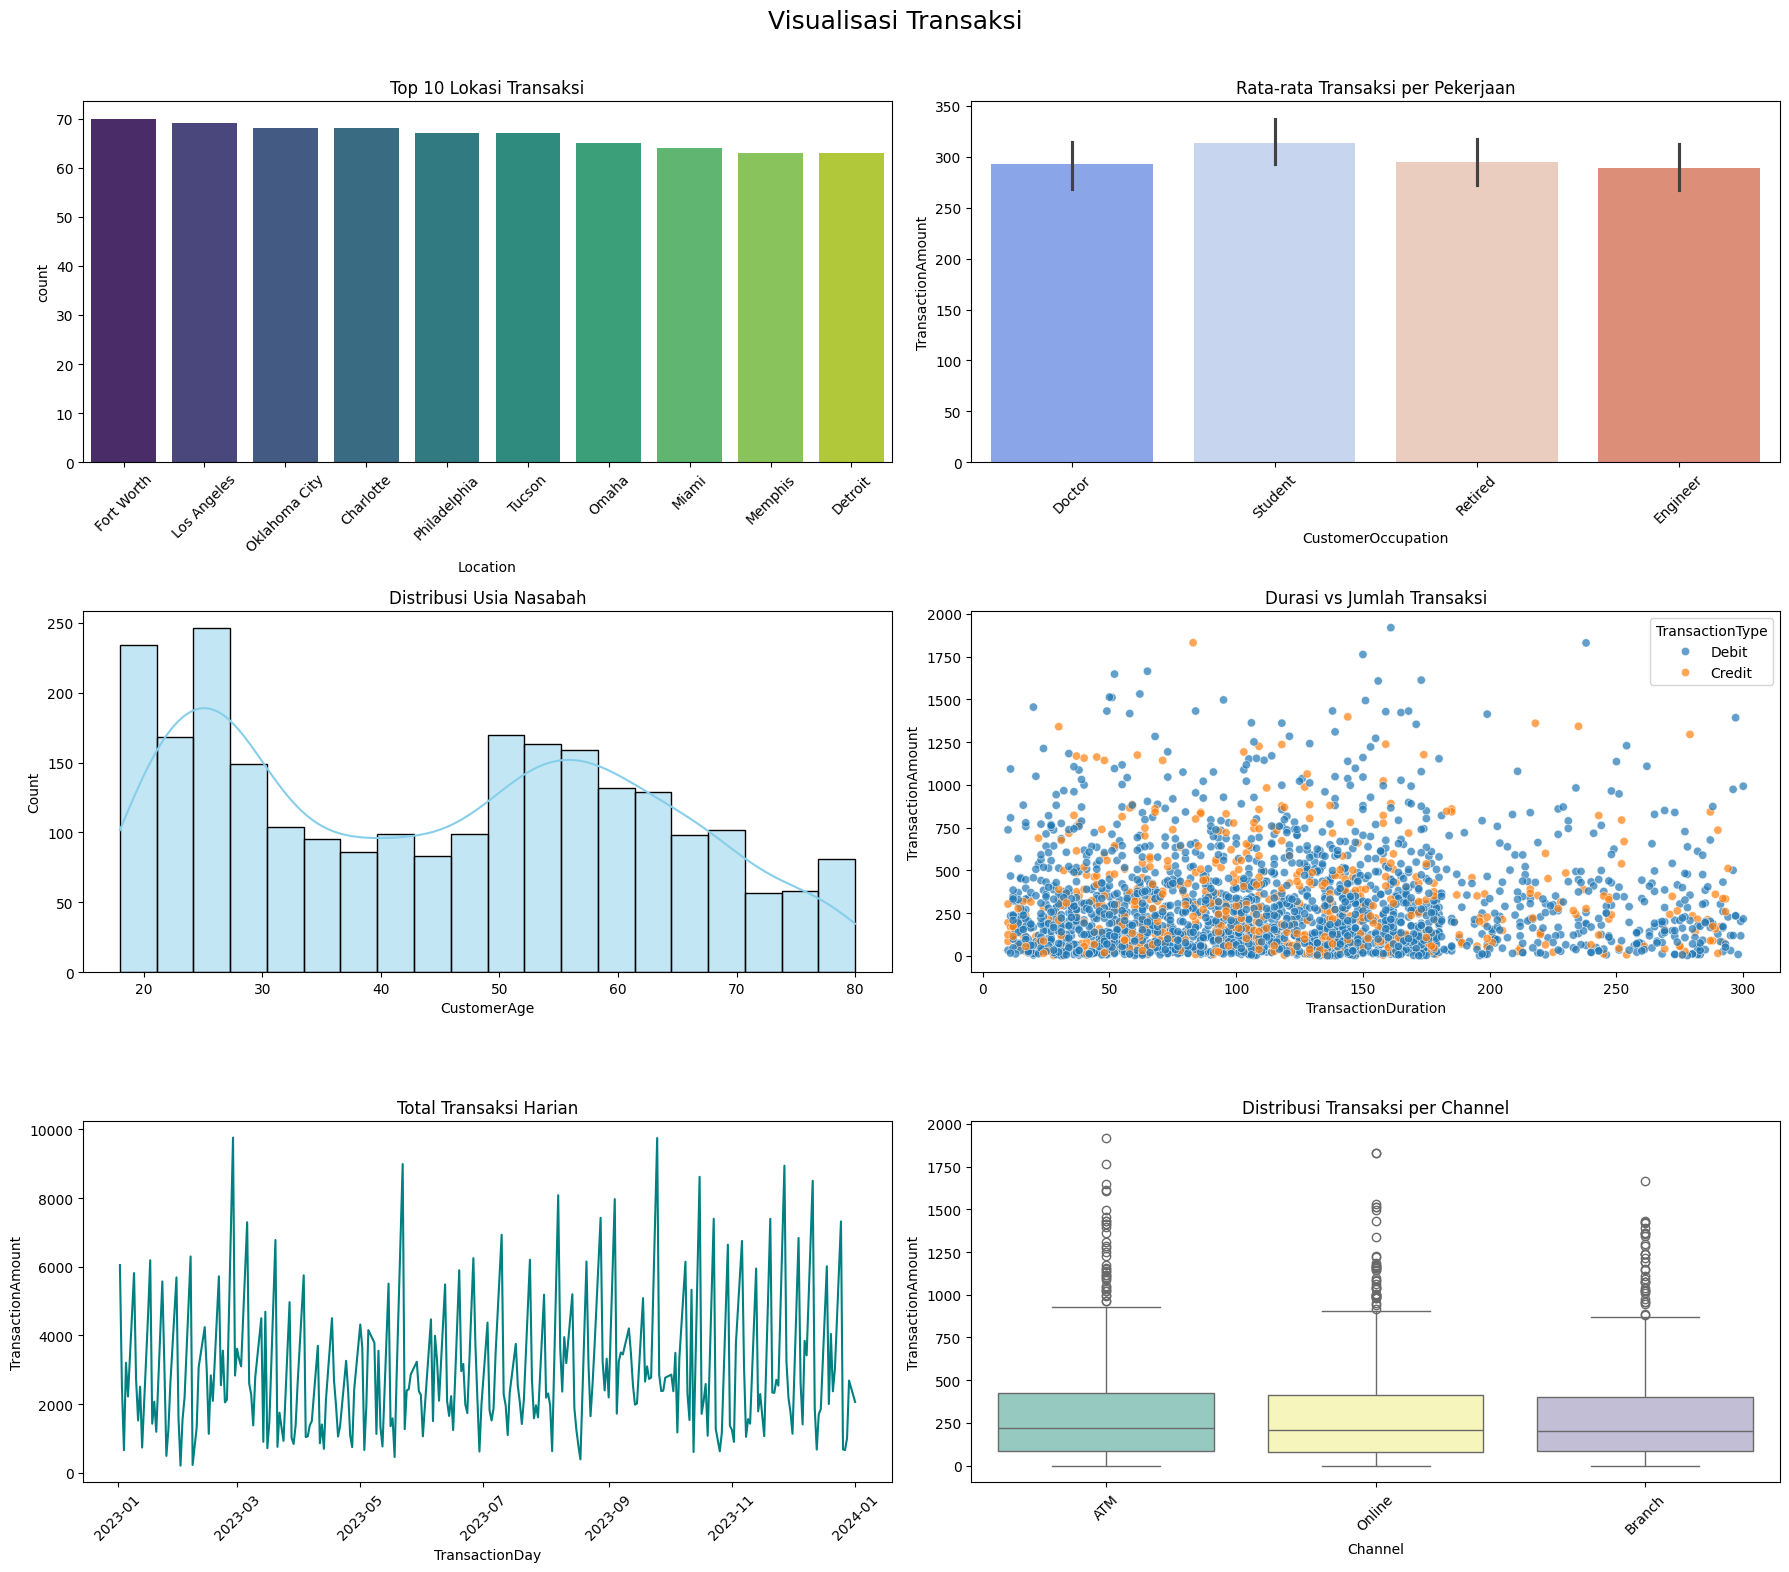

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Visualisasi Transaksi', fontsize=18)


# 1. Distribusi Transaksi per Lokasi (Top 10)
top_locations = df['Location'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Location'].isin(top_locations)], x='Location', order=top_locations, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Lokasi Transaksi')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Rata-rata Jumlah Transaksi berdasarkan Pekerjaan
sns.barplot(data=df, x='CustomerOccupation', y='TransactionAmount', estimator='mean', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Rata-rata Transaksi per Pekerjaan')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Distribusi Usia Nasabah (Histogram)
sns.histplot(df['CustomerAge'], bins=20, kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Usia Nasabah')

# 4. Durasi vs Jumlah Transaksi (Scatter)
sns.scatterplot(data=df, x='TransactionDuration', y='TransactionAmount', hue='TransactionType', alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Durasi vs Jumlah Transaksi')

# 5. Tren Transaksi Harian (Lineplot)
df['TransactionDay'] = df['TransactionDate'].dt.date
daily_tx = df.groupby('TransactionDay')['TransactionAmount'].sum().reset_index()
sns.lineplot(data=daily_tx, x='TransactionDay', y='TransactionAmount', color='teal', ax=axes[2, 0])
axes[2, 0].set_title('Total Transaksi Harian')
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Boxplot Outlier per Channel
sns.boxplot(data=df, x='Channel', y='TransactionAmount', palette='Set3', ax=axes[2, 1])
axes[2, 1].set_title('Distribusi Transaksi per Channel')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # untuk space judul utama
plt.show()


In [ ]:
df_awal = df
df_awal

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionDay
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2023-04-11
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2023-06-27
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,2023-07-10
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2023-05-05
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2023-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,2023-04-26
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,2023-03-22
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,2023-08-21
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,2023-02-24


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df = df.dropna()

In [ ]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionDay
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2023-04-11
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2023-06-27
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,2023-07-10
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2023-05-05
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2023-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,2023-04-26
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,2023-03-22
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,2023-08-21
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,2023-02-24


In [ ]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
df = df.drop_duplicates()

Kolom: TransactionAmount
Jumlah outlier: 113
     TransactionAmount
74             1212.51
82              922.55
85             1340.19
110            1045.22
129            1036.66
----------------------------------------
Kolom: CustomerAge
Jumlah outlier: 0
Empty DataFrame
Columns: [CustomerAge]
Index: []
----------------------------------------
Kolom: TransactionDuration
Jumlah outlier: 0
Empty DataFrame
Columns: [TransactionDuration]
Index: []
----------------------------------------
Kolom: LoginAttempts
Jumlah outlier: 122
    LoginAttempts
23              3
26              5
32              3
38              2
61              2
----------------------------------------
Kolom: AccountBalance
Jumlah outlier: 0
Empty DataFrame
Columns: [AccountBalance]
Index: []
----------------------------------------


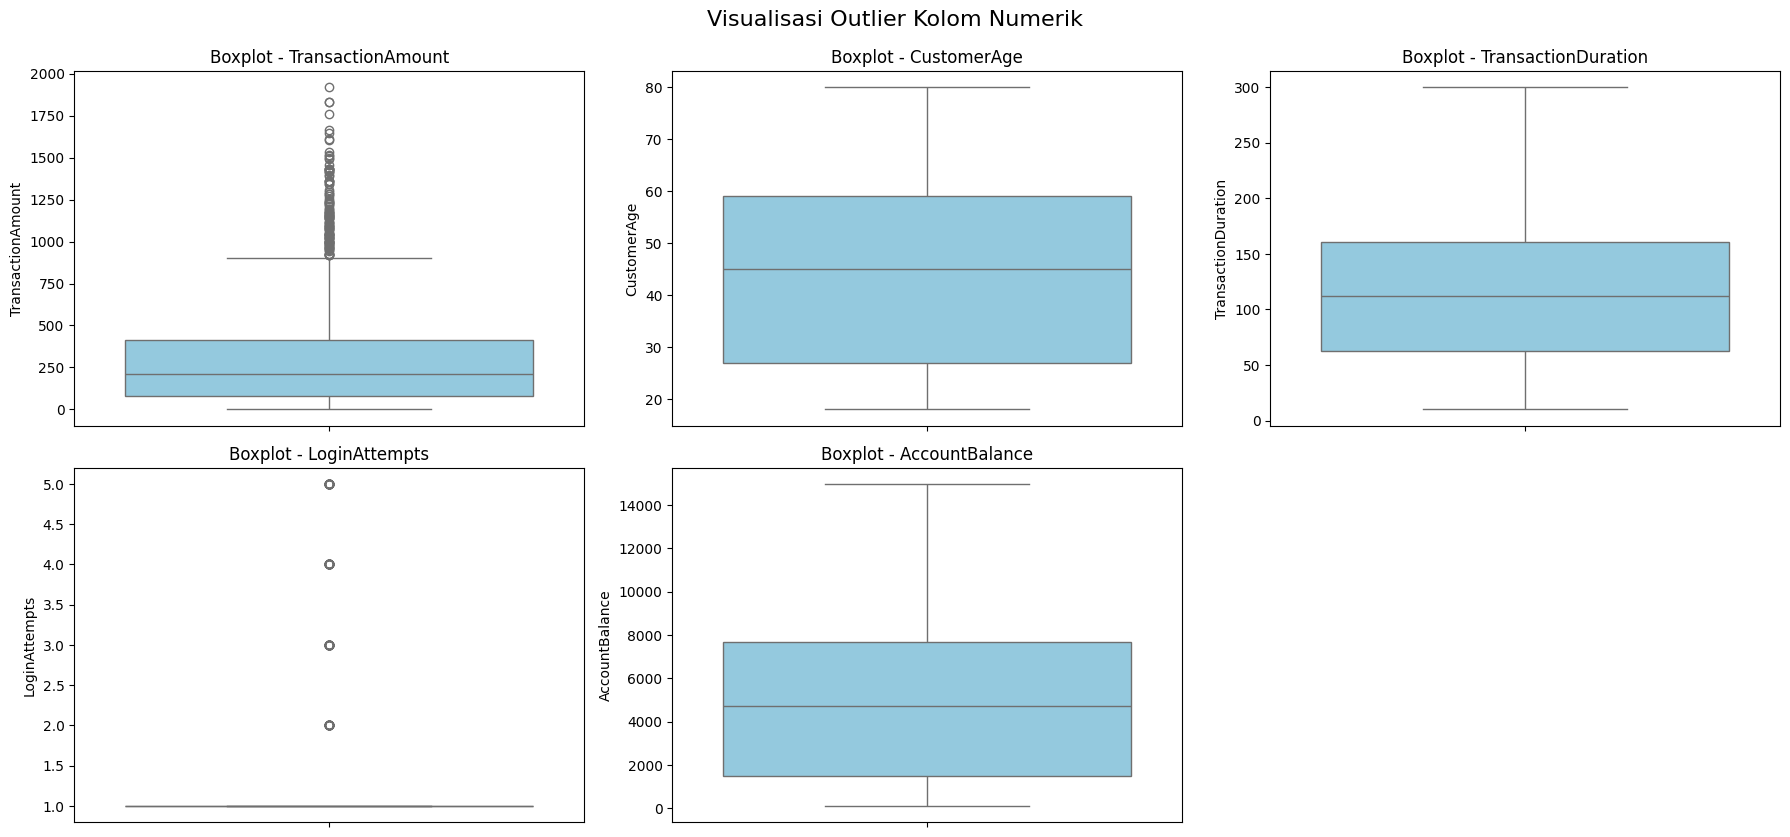

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# 3. Deteksi dan tampilkan outlier tiap kolom
for col in valid_num_cols:
    outliers, low, up = detect_outliers_iqr(df, col)
    print(f"Kolom: {col}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[col]].head())
    print("-" * 40)

plt.figure(figsize=(18, 12))
for i, col in enumerate(valid_num_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.suptitle('Visualisasi Outlier Kolom Numerik', fontsize=16, y=1.02)
plt.show()

In [ ]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionDay
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2023-04-11
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2023-06-27
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,2023-07-10
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2023-05-05
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2023-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,2023-04-26
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,2023-03-22
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,2023-08-21
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,2023-02-24


In [ ]:
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499


In [ ]:
df = df.drop(columns=["TransactionID","AccountID","TransactionDate","PreviousTransactionDate","TransactionDay","IP Address"])

Karena kita ingin melakukan klusterisasi, kita akan menghapus kolom-kolom yang memberikan informasi yang sedikit ataupun tidak berkontribusi apa-apa terhadap variasi data kita. Termasuk PreviousTransactionDate, TransactionDate, yang dimana tipe data mereka seharusnya berupa Date Time, dan untuk DateTime sendiri pastinya memiliki variasi yang terlalu banyak dan terlalu berbeda-beda, sehingga untuk melakukan klusterisasi untuk hal itu pasti akan sulit

In [ ]:
df_asli = df
df_asli

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40
...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Colorado Springs,D000625,M072,Branch,33,Doctor,109,1,12690.79
2508,251.54,Debit,Tucson,D000410,M029,Branch,48,Doctor,177,1,254.75
2509,28.63,Debit,San Diego,D000095,M087,Branch,56,Retired,146,1,3382.91
2510,185.97,Debit,Denver,D000634,M041,Online,23,Student,19,1,1776.91


In [ ]:
numerical_cols = [
    'TransactionAmount',
    'AccountBalance',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts'
]

categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

for col in categorical_cols:
    freq_map = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq_map)


In [ ]:
df = df.drop(columns=['DeviceID', 'MerchantID','Location'], errors='ignore')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
X_final = df.copy()
print("Preprocessing selesai. Bentuk akhir data:", X_final.shape)
X_final.head()

Preprocessing selesai. Bentuk akhir data: (2512, 8)


,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,0.773885,0.331608,1.423718,0.251194,-0.552443,-0.206794,-0.000537
1,0.269440,0.773885,0.331608,1.311287,0.251194,0.305314,-0.206794,2.216472
2,-0.586882,0.773885,0.322850,-1.443277,0.261545,-0.909842,-0.206794,-1.023534
3,-0.387456,0.773885,0.322850,-1.049768,0.261545,-1.353017,-0.206794,0.885797
4,-0.973468,0.226115,0.322850,-1.049768,0.261545,1.120184,-0.206794,0.593589


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### KMEANS - Sebelum Feature Selection

In [ ]:
def build_kmeans_model(X_final, df, model_output_path='kmeans_model.pkl', result_output_path='clustered_data.pkl'):
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.metrics import silhouette_score
    import pickle

    k = 6
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    df['Cluster'] = model.fit_predict(X_final)
    score = silhouette_score(X_final, df['Cluster'])

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_final)
    df['PCA1'] = X_pca[:, 0]
    df['PCA2'] = X_pca[:, 1]

    with open(model_output_path, 'wb') as f:
        pickle.dump(model, f)

    with open(result_output_path, 'wb') as f:
        pickle.dump({'df': df, 'score': score}, f)

    print(f"KMeans berhasil diterapkan dengan {k} cluster.")
    print(f"Silhouette Score          : {score:.4f}")
    print(f"Model disimpan ke         : {model_output_path}")
    print(f"Data + Score disimpan ke  : {result_output_path}")

    return score

build_kmeans_model(X_final,df)

KMeans berhasil diterapkan dengan 6 cluster.
Silhouette Score          : 0.2558
Model disimpan ke         : kmeans_model.pkl
Data + Score disimpan ke  : clustered_data.pkl


np.float64(0.25581939183058383)

### DBSCAN - Sebelum Feature Selection

In [ ]:
def run_best_dbscan(X_final, df, cluster_col='Cluster_DBSCAN',
                    result_output_path='dbscan_result.pkl'):
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score
    import numpy as np
    import pickle

    eps_values = np.arange(0.2, 2.0, 0.1)
    min_samples_values = range(3, 10, 2)

    best_eps, best_min_samples, best_score = None, None, -1
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_final)

            unique_clusters = set(labels) - {-1}
            if len(unique_clusters) > 1:
                score = silhouette_score(X_final[labels != -1], labels[labels != -1])
                if score > best_score:
                    best_eps, best_min_samples, best_score = eps, min_samples, score
                    best_labels = labels

    if best_labels is None:
        print("Tidak ada kombinasi parameter yang menghasilkan lebih dari 1 cluster.")
        return None

    # Simpan hasil terbaik
    df[cluster_col] = best_labels
    with open(result_output_path, 'wb') as f:
        pickle.dump({
            'df': df,
            'eps': best_eps,
            'min_samples': best_min_samples,
            'score': best_score
        }, f)

    print(f"DBSCAN terbaik ditemukan:")
    print(f"eps             : {best_eps:.4f}")
    print(f"min_samples     : {best_min_samples}")
    print(f"Silhouette Score: {best_score:.4f}")
    print(f"Jumlah cluster  : {len(set(best_labels) - {-1})} (tanpa noise)")
    print(f"Hasil disimpan ke         : {result_output_path}")

    return result_output_path
result_path = run_best_dbscan(X_final, df)

DBSCAN terbaik ditemukan:
eps             : 1.1000
min_samples     : 7
Silhouette Score: 0.6298
Jumlah cluster  : 2 (tanpa noise)
Hasil disimpan ke         : dbscan_result.pkl


## **b. Feature Selection**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans

X_final = X_final.copy()
X_final = pd.get_dummies(X_final, drop_first=True)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_final)

mi_scores = mutual_info_classif(X_final, cluster_labels, discrete_features="auto")
feature_importance_df = pd.DataFrame({"Feature": X_final.columns, "MI-Score": mi_scores})
feature_importance_df = feature_importance_df.sort_values(by="MI-Score", ascending=False)

best_features_mi = feature_importance_df["Feature"].values[:7]

print("Fitur terbaik berdasarkan Mutual Information:")
print(best_features_mi)


Fitur terbaik berdasarkan Mutual Information:
['CustomerAge' 'CustomerOccupation' 'AccountBalance' 'LoginAttempts'
 'TransactionAmount' 'TransactionType' 'Channel']


Kalau dilihat, ada 7 kolom yang bisa kita gunakan. Yang mana, saya mau CustomerAge itu tidak dipakai, karena dia memiliki korelasi yang cukup tinggi dengan AccountBalance (High Multicollinearity), dan juga jika dilihat variasi di CustomerAge terlalu tinggi, sehingga bisa merusak klusterisasi nantinya. Oleh karena itu saya menggunakan Kolom CustomerOccupation,AccountBalance, LoginAttempts, TransactionAmount, TransactionType, Channel

### KMEANS - Sesudah Feature Selection

In [ ]:
selected_columns = ['TransactionAmount', 'TransactionType', 'Channel', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']
X_selected = X_final[selected_columns].copy()

In [ ]:
def fit_kmeans_and_save(X_selected, best_k=2, model_path="kmeans_best_model.pkl"):
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_selected)
    score = silhouette_score(X_selected, labels)

    # Simpan model ke pkl
    joblib.dump(kmeans, model_path)

    print("✅ Model KMeans berhasil dibuat dan disimpan!")
    print(f"🔹 Jumlah cluster   : {best_k}")
    print(f"🔹 Silhouette Score : {score:.4f}")
    print(f"📁 Disimpan ke      : {model_path}")

    return kmeans, labels, score

model_path = "kmeans_best_model.pkl"
kmeans_model, labels, score = fit_kmeans_and_save(X_selected, best_k=2, model_path=model_path)


✅ Model KMeans berhasil dibuat dan disimpan!
🔹 Jumlah cluster   : 2
🔹 Silhouette Score : 0.6662
📁 Disimpan ke      : kmeans_best_model.pkl


### DBSCAN - Sesudah Feature Selection

In [ ]:
def save_dbscan_model(X_selected, model_path="dbscan_best_model.pkl", label_col='Cluster_DBSCAN'):
    eps_values = np.arange(0.5, 2.5, 0.1)
    min_samples_values = range(3, 12, 1)

    best_eps, best_min_samples, best_score = None, None, -1
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_selected)

            unique_clusters = set(labels) - {-1}
            if len(unique_clusters) > 1:
                score = silhouette_score(X_selected[labels != -1], labels[labels != -1])
                if score > best_score:
                    best_eps, best_min_samples, best_score = eps, min_samples, score
                    best_labels = labels
                    best_model = dbscan

    if best_labels is None:
        print("Tidak ada kombinasi parameter yang menghasilkan lebih dari 1 cluster.")
        return None

    print("=" * 60)
    print(f"DBSCAN terbaik ditemukan:")
    print(f"eps             : {best_eps}")
    print(f"min_samples     : {best_min_samples}")
    print(f"Silhouette Score: {best_score:.4f}")
    print(f"Model disimpan ke: {model_path}")

    joblib.dump({
        'model': best_model,
        'labels': best_labels,
        'eps': best_eps,
        'min_samples': best_min_samples,
        'silhouette': best_score
    }, model_path)

    return best_model, best_labels, best_eps, best_min_samples, best_score

save_dbscan_model(X_selected, model_path="dbscan_selected.pkl")

DBSCAN terbaik ditemukan:
eps             : 0.6
min_samples     : 9
Silhouette Score: 0.7531
Model disimpan ke: dbscan_selected.pkl


(DBSCAN(eps=np.float64(0.6), min_samples=9),
 array([0, 0, 0, ..., 0, 0, 0]),
 np.float64(0.6),
 9,
 np.float64(0.7531444515376492))

## **c. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### KMEANS - Sebelum Feature Selection

In [ ]:
def evaluate_multiple_k(X, k_range=range(2, 11)):
    inertias = []
    silhouettes = []

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X)
        inertias.append(model.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    return inertias, silhouettes

def compare_elbow_and_silhouette(X1, X2, k_range=range(2, 11), label1='Before FS', label2='After FS'):
    # Evaluasi model
    inertias1, sils1 = evaluate_multiple_k(X1, k_range)
    inertias2, sils2 = evaluate_multiple_k(X2, k_range)

    # Visualisasi
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Elbow Method
    axs[0].plot(k_range, inertias1, 'o-', label=label1, color='blue')
    axs[0].plot(k_range, inertias2, 'o--', label=label2, color='red')
    axs[0].set_title("Metode Elbow")
    axs[0].set_xlabel("Jumlah Cluster (k)")
    axs[0].set_ylabel("Inertia")
    axs[0].legend()
    axs[0].grid(True)

    # Silhouette Score
    axs[1].plot(k_range, sils1, 'o-', label=label1, color='green')
    axs[1].plot(k_range, sils2, 'o--', label=label2, color='orange')
    axs[1].set_title("Silhouette Score")
    axs[1].set_xlabel("Jumlah Cluster (k)")
    axs[1].set_ylabel("Silhouette Score")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()



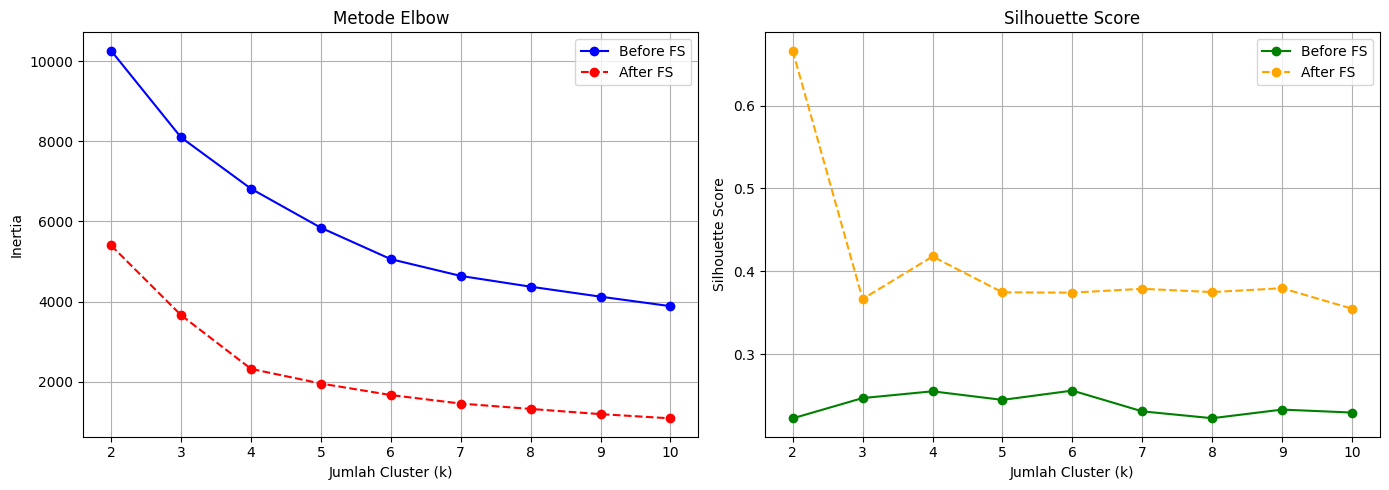

In [ ]:
compare_elbow_and_silhouette(X_final, X_selected, label1='Before FS', label2='After FS')


### DBSCAN - Sebelum Feature selection

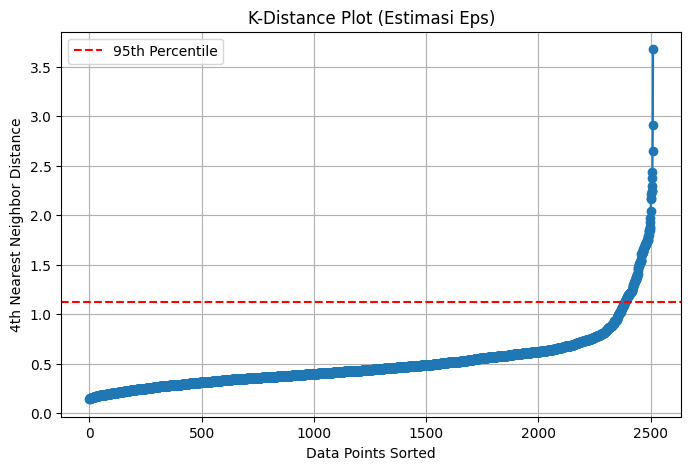

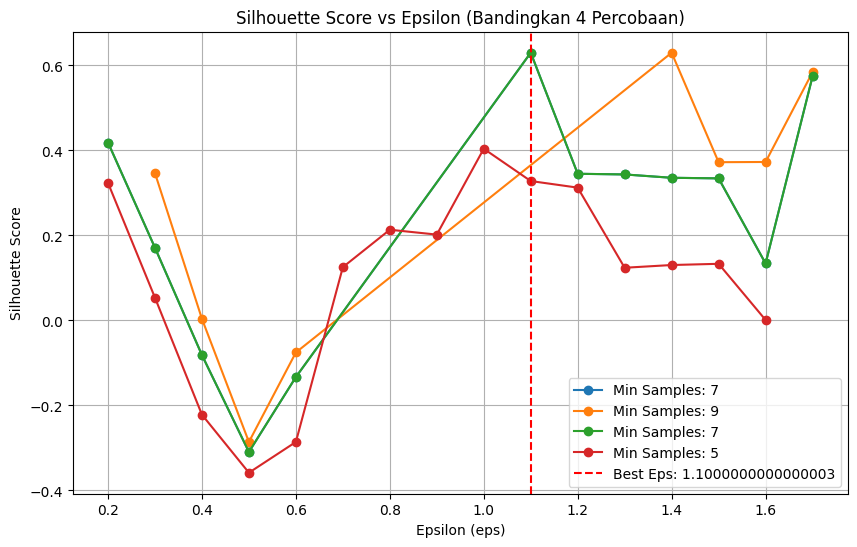

DBSCAN terbaik: eps=1.1000000000000003, min_samples=7, Silhouette Score=0.6298


In [ ]:
X_selected = X_final
neigh = NearestNeighbors(n_neighbors=4)  # min_samples - 1
neigh.fit(X_selected)
distances, _ = neigh.kneighbors(X_selected)

# Ambil jarak terjauh ke-4 untuk setiap titik, lalu urutkan
k_distance = np.sort(distances[:, -1])
plt.figure(figsize=(8, 5))
plt.plot(range(len(k_distance)), k_distance, marker='o', linestyle='-')  # Menggunakan line plot
plt.axhline(y=np.percentile(k_distance, 95), color='r', linestyle='--', label='95th Percentile')
plt.xlabel("Data Points Sorted")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Plot (Estimasi Eps)")
plt.legend()
plt.grid(True)
plt.show()

#Membuat Model DBSCAN
eps_values = np.arange(0.2, 2.0, 0.1)
min_samples_values = range(3, 10, 2)

silhouette_scores = []
eps_list = []
min_samples_list = []

best_eps, best_min_samples, best_score = None, None, -1
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_selected)
        unique_clusters = set(labels) - {-1}
        if len(unique_clusters) > 1:
            score = silhouette_score(X_selected[labels != -1], labels[labels != -1])
            silhouette_scores.append(score)
            eps_list.append(eps)
            min_samples_list.append(min_samples)

            if score > best_score:
                best_eps, best_min_samples, best_score = eps, min_samples, score
                best_labels = labels

plt.figure(figsize=(10, 6))
unique_min_samples = sorted(set(min_samples_list), reverse=True)
top_min_samples = [best_min_samples] + unique_min_samples[:3]

for min_samples in top_min_samples:
    idx = [i for i in range(len(eps_list)) if min_samples_list[i] == min_samples]
    plt.plot(np.array(eps_list)[idx], np.array(silhouette_scores)[idx], marker='o', linestyle='-', label=f"Min Samples: {min_samples}")

plt.axvline(x=best_eps, color='r', linestyle="--", label=f"Best Eps: {best_eps}")
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Epsilon (Bandingkan 4 Percobaan)")
plt.legend()
plt.grid(True)
plt.show()

if best_labels is None:
    print("Tidak ada kombinasi yang menghasilkan lebih dari 1 cluster.")
else:
    df['Cluster_DBSCAN'] = best_labels
    df_filtered = df[df['Cluster_DBSCAN'] != -1]
    X_filtered = X_selected[df['Cluster_DBSCAN'] != -1]

    print(f"DBSCAN terbaik: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score={best_score:.4f}")


### DBSCAN - Best

### New Section

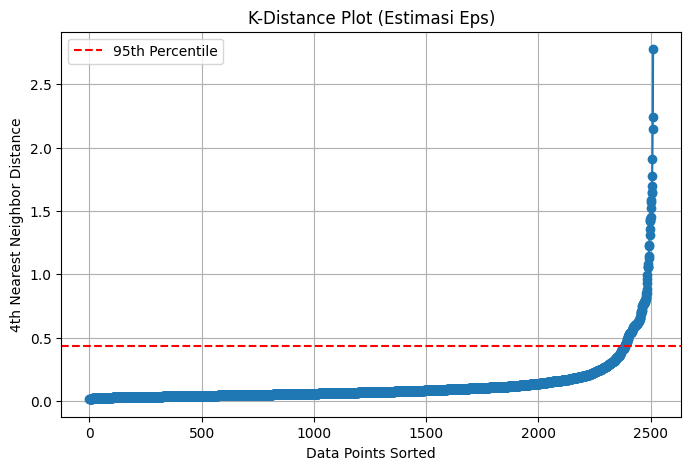

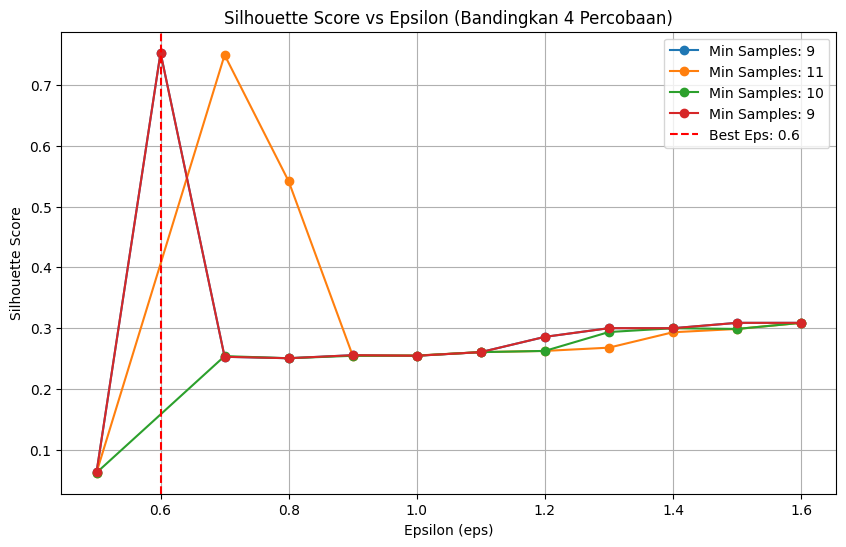

DBSCAN terbaik: eps=0.6, min_samples=9, Silhouette Score=0.7531


In [ ]:
selected_columns = ['TransactionAmount', 'TransactionType', 'Channel', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']
X_selected = X_final[selected_columns]

neigh = NearestNeighbors(n_neighbors=4)  # min_samples - 1
neigh.fit(X_selected)
distances, _ = neigh.kneighbors(X_selected)
k_distance = np.sort(distances[:, -1])
plt.figure(figsize=(8, 5))
plt.plot(range(len(k_distance)), k_distance, marker='o', linestyle='-')
plt.axhline(y=np.percentile(k_distance, 95), color='r', linestyle='--', label='95th Percentile')
plt.xlabel("Data Points Sorted")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Plot (Estimasi Eps)")
plt.legend()
plt.grid(True)
plt.show()

eps_values = np.arange(0.5, 2.5, 0.1)
min_samples_values = range(3, 12, 1)

silhouette_scores = []
eps_list = []
min_samples_list = []

best_eps, best_min_samples, best_score = None, None, -1
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_selected)

        # Cek apakah ada lebih dari 1 cluster valid
        unique_clusters = set(labels) - {-1}
        if len(unique_clusters) > 1:
            score = silhouette_score(X_selected[labels != -1], labels[labels != -1])
            silhouette_scores.append(score)
            eps_list.append(eps)
            min_samples_list.append(min_samples)

            if score > best_score:
                best_eps, best_min_samples, best_score = eps, min_samples, score
                best_labels = labels

plt.figure(figsize=(10, 6))
unique_min_samples = sorted(set(min_samples_list), reverse=True)
top_min_samples = [best_min_samples] + unique_min_samples[:3]

for min_samples in top_min_samples:
    idx = [i for i in range(len(eps_list)) if min_samples_list[i] == min_samples]
    plt.plot(np.array(eps_list)[idx], np.array(silhouette_scores)[idx], marker='o', linestyle='-', label=f"Min Samples: {min_samples}")

plt.axvline(x=best_eps, color='r', linestyle="--", label=f"Best Eps: {best_eps}")
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Epsilon (Bandingkan 4 Percobaan)")
plt.legend()
plt.grid(True)
plt.show()

if best_labels is None:
    print("Tidak ada kombinasi yang menghasilkan lebih dari 1 cluster.")
else:
    df['Cluster_DBSCAN'] = best_labels
    df_filtered = df[df['Cluster_DBSCAN'] != -1]
    X_filtered = X_selected[df['Cluster_DBSCAN'] != -1]

    print(f"DBSCAN terbaik: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score={best_score:.4f}")


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

### KMEANS - Sebelum Feature Selection

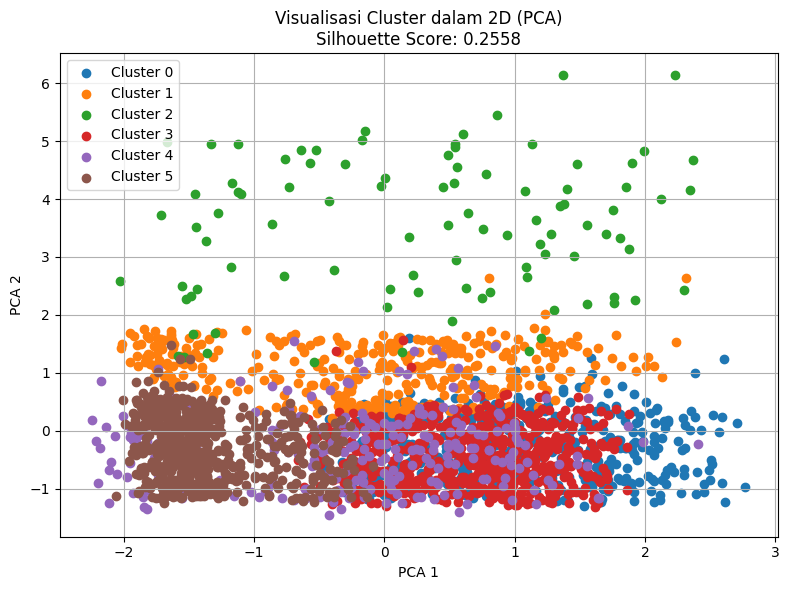

In [ ]:
def plot_clusters_from_file(result_path='clustered_data.pkl'):
    import pickle
    import matplotlib.pyplot as plt

    with open(result_path, 'rb') as f:
        data = pickle.load(f)

    df = data['df']
    silhouette_score_val = data.get('score', None)

    plt.figure(figsize=(8, 6))
    for cluster in sorted(df['Cluster'].unique()):
        plt.scatter(
            df[df['Cluster'] == cluster]['PCA1'],
            df[df['Cluster'] == cluster]['PCA2'],
            label=f'Cluster {cluster}'
        )

    title = "Visualisasi Cluster dalam 2D (PCA)"
    if silhouette_score_val is not None:
        title += f"\nSilhouette Score: {silhouette_score_val:.4f}"

    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_clusters_from_file('clustered_data.pkl')

### DBSCAN - Sebelum Feature selection

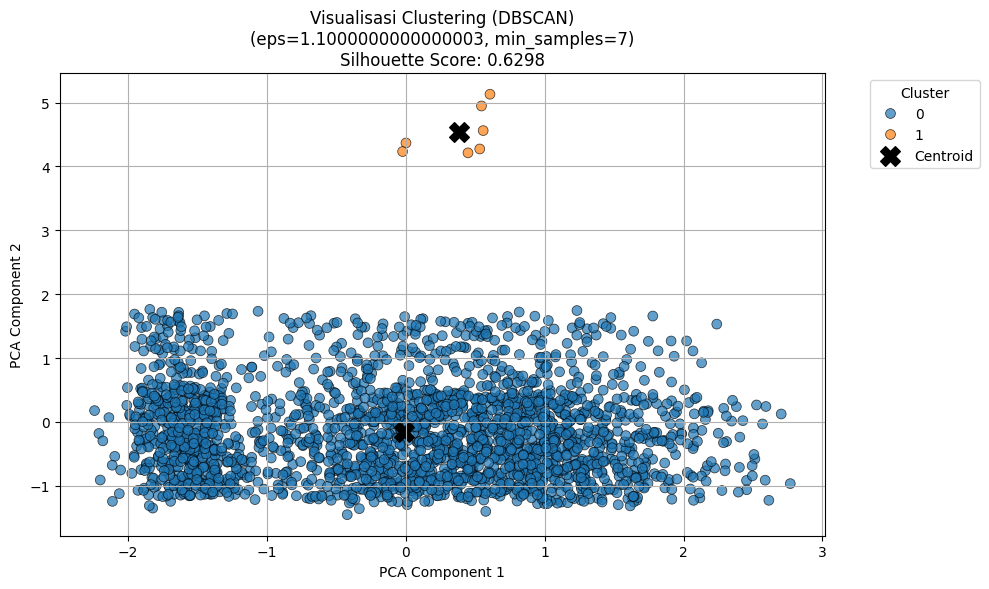

In [ ]:
def plot_dbscan_clusters_from_file(result_path='dbscan_result.pkl', X_final=None, cluster_col='Cluster_DBSCAN'):
    import pickle
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.decomposition import PCA

    # Load hasil DBSCAN
    with open(result_path, 'rb') as f:
        data = pickle.load(f)

    df = data['df']
    best_eps = data['eps']
    best_min_samples = data['min_samples']
    silhouette_score_val = data['score']

    if cluster_col not in df.columns:
        print("Kolom cluster tidak ditemukan di DataFrame.")
        return

    df_filtered = df[df[cluster_col] !=-1]

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_final)
    df['PCA1'] = X_pca[:, 0]
    df['PCA2'] = X_pca[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_filtered, x='PCA1', y='PCA2', hue=cluster_col,
        palette='tab10', s=50, alpha=0.7, edgecolor='k'
    )

    centroids = df_filtered.groupby(cluster_col)[['PCA1', 'PCA2']].mean()
    plt.scatter(
        centroids['PCA1'], centroids['PCA2'],
        c='black', s=200, marker='X', label='Centroid'
    )

    title = f'Visualisasi Clustering (DBSCAN)\n(eps={best_eps}, min_samples={best_min_samples})'
    if silhouette_score_val is not None:
        title += f'\nSilhouette Score: {silhouette_score_val:.4f}'

    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_dbscan_clusters_from_file(result_path, X_final)

### KMEANS - Sesudah Feature Selection

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


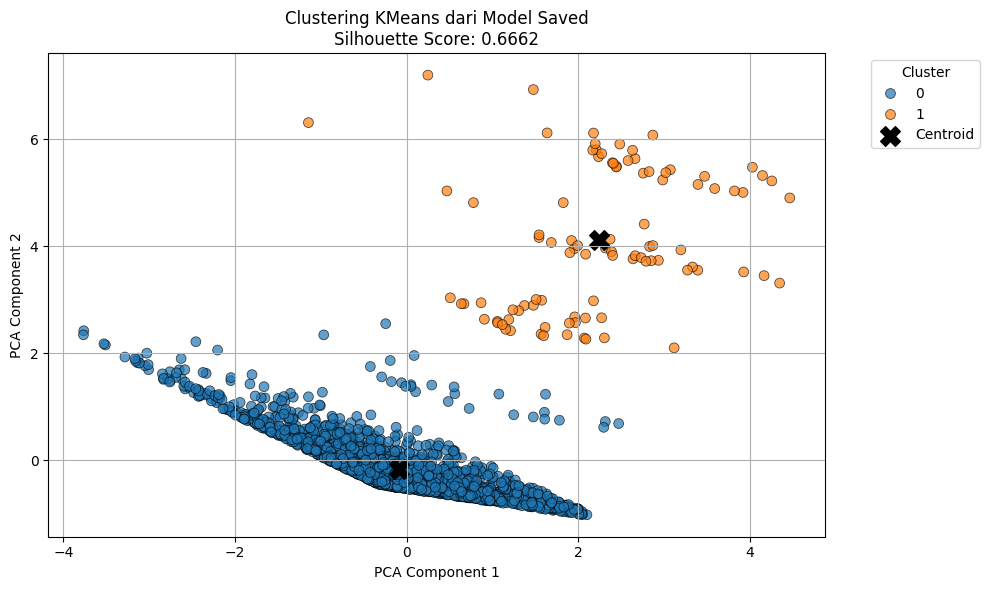

In [ ]:
def plot_pca_kmeans_from_pkl(X_selected, model_path="kmeans_best_model.pkl"):
    import joblib
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.decomposition import PCA

    # Load model
    kmeans = joblib.load(model_path)
    labels = kmeans.predict(X_selected)
    centers = kmeans.cluster_centers_

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_selected)
    centers_pca = pca.transform(centers)

    # Silhouette score
    from sklearn.metrics import silhouette_score
    score = silhouette_score(X_selected, labels)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1], hue=labels,
        palette='tab10', s=50, alpha=0.7, edgecolor='k'
    )

    plt.scatter(
        centers_pca[:, 0], centers_pca[:, 1],
        c='black', s=200, marker='X', label='Centroid'
    )

    plt.title(f'Clustering KMeans dari Model Saved\nSilhouette Score: {score:.4f}')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

selected_columns = ['TransactionAmount', 'TransactionType', 'Channel', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']
X_selected = X_final[selected_columns].copy()
plot_pca_kmeans_from_pkl(X_selected, model_path="kmeans_best_model.pkl")


### DBSCAN - Sesudah Feature Selection

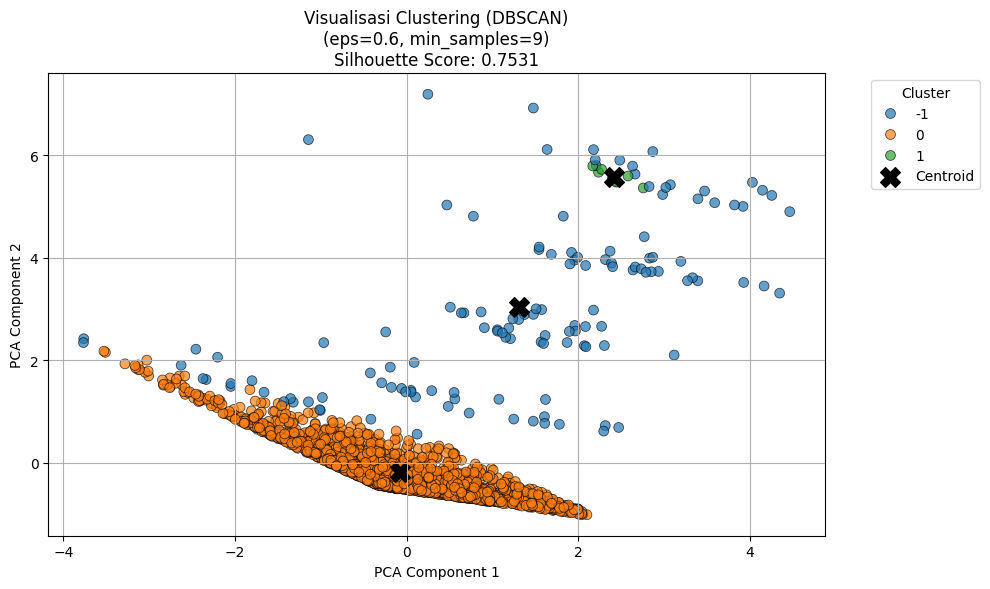

In [ ]:
def plot_pca_dbscan_from_pkl(X_selected, model_path="dbscan_best_model.pkl", label_col='Cluster_DBSCAN'):
    import joblib
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.decomposition import PCA

    # Load model dan data
    data = joblib.load(model_path)
    labels = data['labels']
    silhouette_score_val = data['silhouette']
    eps = data['eps']
    min_samples = data['min_samples']

    df = pd.DataFrame(X_selected.copy())
    df[label_col] = labels

    df_filtered = df.copy()

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_selected)
    df['PCA1'] = X_pca[:, 0]
    df['PCA2'] = X_pca[:, 1]
    df_filtered['PCA1'] = df.loc[df_filtered.index, 'PCA1']
    df_filtered['PCA2'] = df.loc[df_filtered.index, 'PCA2']

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_filtered, x='PCA1', y='PCA2', hue=label_col,
        palette='tab10', s=50, alpha=0.7, edgecolor='k'
    )

    centroids = df_filtered.groupby(label_col)[['PCA1', 'PCA2']].mean()
    plt.scatter(
        centroids['PCA1'], centroids['PCA2'],
        c='black', s=200, marker='X', label='Centroid'
    )

    title = f'Visualisasi Clustering (DBSCAN)\n(eps={eps}, min_samples={min_samples})'
    title += f'\nSilhouette Score: {silhouette_score_val:.4f}'

    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_pca_dbscan_from_pkl(X_selected, model_path="dbscan_selected.pkl")


## **e. Analisis dan Interpretasi Hasil Cluster**

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df = df[selected_columns]

In [ ]:
dbscan_result = joblib.load("dbscan_selected.pkl")
cluster_labels = dbscan_result['labels']
if len(df) == len(cluster_labels):
    df['Cluster_DBSCAN'] = cluster_labels
    print("Kolom 'Cluster_DBSCAN' berhasil ditambahkan ke df!")
else:
    print("Panjang data tidak sesuai. Pastikan df dan X_selected berasal dari sumber yang sama!")


Kolom 'Cluster_DBSCAN' berhasil ditambahkan ke df!


In [ ]:
df

,TransactionAmount,TransactionType,Channel,LoginAttempts,AccountBalance,CustomerOccupation,Cluster_DBSCAN
0,-0.971275,0.773885,0.331608,-0.206794,-0.000537,0.251194,0
1,0.269440,0.773885,0.331608,-0.206794,2.216472,0.251194,0
2,-0.586882,0.773885,0.322850,-0.206794,-1.023534,0.261545,0
3,-0.387456,0.773885,0.322850,-0.206794,0.885797,0.261545,0
4,-0.973468,0.226115,0.322850,-0.206794,0.593589,0.261545,0
...,...,...,...,...,...,...,...
2507,1.913802,0.226115,0.345541,-0.206794,1.942606,0.251194,0
2508,-0.157779,0.773885,0.345541,-0.206794,-1.245986,0.251194,0
2509,-0.921462,0.773885,0.345541,-0.206794,-0.443928,0.238455,0
2510,-0.382420,0.773885,0.322850,-0.206794,-0.855705,0.261545,0


In [ ]:
df.Cluster_DBSCAN.value_counts()

,count
Cluster_DBSCAN,
0,2370
-1,133
1,9


In [ ]:
df_cluster = df[['Cluster_DBSCAN']] if 'Cluster_DBSCAN' in df.columns else None

numerical_cols = ['TransactionAmount', 'AccountBalance', 'LoginAttempts']
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

scaler = StandardScaler()
scaler.fit(df_awal[numerical_cols])
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
df[categorical_cols] = df_awal[categorical_cols]

print(df.head())


   TransactionAmount TransactionType Channel  LoginAttempts  AccountBalance  \
0              14.09           Debit     ATM            1.0         5112.21   
1             376.24           Debit     ATM            1.0        13758.91   
2             126.29           Debit  Online            1.0         1122.35   
3             184.50           Debit  Online            1.0         8569.06   
4              13.45          Credit  Online            1.0         7429.40   

  CustomerOccupation  Cluster_DBSCAN  
0             Doctor               0  
1             Doctor               0  
2            Student               0  
3            Student               0  
4            Student               0  


### Interpretasi Target

In [ ]:
print("Jumlah sampel dalam tiap cluster:")
print(df['Cluster_DBSCAN'].value_counts())

Jumlah sampel dalam tiap cluster:
Cluster_DBSCAN
 0    2370
-1     133
 1       9
Name: count, dtype: int64


In [ ]:
cluster_summary = df.groupby('Cluster_DBSCAN')[['TransactionAmount', 'AccountBalance', 'LoginAttempts']].mean()
print("\nRata-rata fitur numerik dalam tiap cluster:")
print(cluster_summary)


Rata-rata fitur numerik dalam tiap cluster:
                TransactionAmount  AccountBalance  LoginAttempts
Cluster_DBSCAN                                                  
-1                     464.417820     6309.243609       3.082707
 0                     288.591241     5062.208439       1.000000
 1                     202.973333     1173.961111       5.000000



Distribusi TransactionType dalam tiap cluster:
Cluster_DBSCAN  TransactionType
-1              Debit              0.714286
                Credit             0.285714
 0              Debit              0.777215
                Credit             0.222785
 1              Debit              0.777778
                Credit             0.222222
Name: proportion, dtype: float64

Distribusi Channel dalam tiap cluster:
Cluster_DBSCAN  Channel
-1              ATM        0.368421
                Online     0.353383
                Branch     0.278195
 0              Branch     0.348101
                ATM        0.329958
                Online     0.321941
 1              Branch     0.666667
                ATM        0.222222
                Online     0.111111
Name: proportion, dtype: float64

Distribusi CustomerOccupation dalam tiap cluster:
Cluster_DBSCAN  CustomerOccupation
-1              Doctor                0.338346
                Engineer              0.263158
                Retire

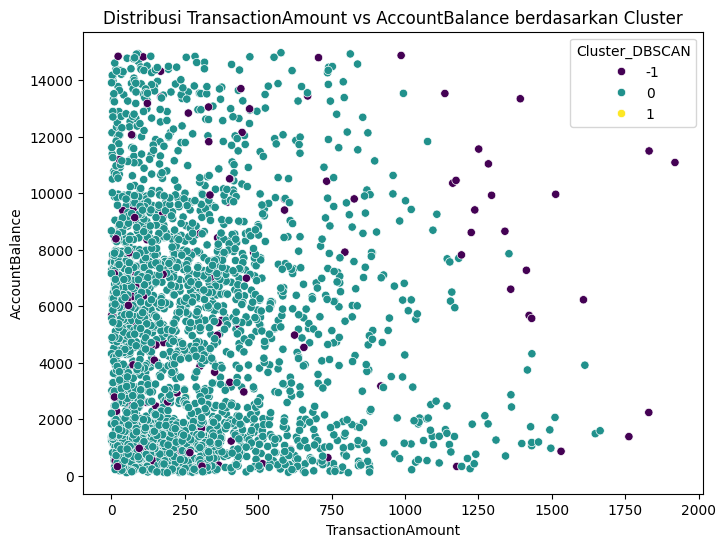

In [ ]:
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    print(f"\nDistribusi {col} dalam tiap cluster:")
    print(df.groupby('Cluster_DBSCAN')[col].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['TransactionAmount'], y=df['AccountBalance'], hue=df['Cluster_DBSCAN'], palette='viridis')
plt.title("Distribusi TransactionAmount vs AccountBalance berdasarkan Cluster")
plt.show()


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1 (Label: 0):
- **Rata-rata Saldo Akun**: 5,062.21
- **Rata-rata Jumlah Transaksi**: 288.59
- **Rata-rata Upaya Login**: 1.00
- **TransactionType paling dominan**: Debit (77.72%)
- **Channel paling dominan**: Branch (34.81%)
- **CustomerOccupation paling dominan**: Student (26.41%)

## Cluster 2 (Label: -1):
- **Rata-rata Saldo Akun**: 6,309.24
- **Rata-rata Jumlah Transaksi**: 464.42
- **Rata-rata Upaya Login**: 3.08
- **TransactionType paling dominan**: Debit (71.43%)
- **Channel paling dominan**: ATM (36.84%)
- **CustomerOccupation paling dominan**: Doctor (33.83%)

## Cluster 3 (Label: 1):
- **Rata-rata Saldo Akun**: 1,173.96
- **Rata-rata Jumlah Transaksi**: 202.97
- **Rata-rata Upaya Login**: 5.00
- **TransactionType paling dominan**: Debit (77.78%)
- **Channel paling dominan**: Branch (66.67%)
- **CustomerOccupation paling dominan**: Student (55.56%)

Tulis hasil interpretasinya di sini.
1. Cluster 1: Cluster ini mencerminkan transaksi normal oleh pelanggan bank. Rata-rata perbandingan antara jumlah transaksi dan saldo tergolong ideal. Upaya login yang hanya satu kali mengindikasikan penggunaan yang wajar dan tidak mencurigakan. Transaksi dominan dilakukan melalui branch dengan jenis transaksi debit, dan mayoritas pelanggan berasal dari kalangan pelajar (student).

2. Cluster 2: Cluster ini mengindikasikan adanya potensi fraud atau aktivitas anomali. Meskipun saldo akun tergolong tinggi, namun jumlah transaksinya juga sangat tinggi, hampir dua kali lipat dari cluster normal. Rata-rata upaya login melebihi 3 kali, yang bisa menjadi indikator percobaan akses mencurigakan. Transaksi banyak dilakukan di ATM, dan dominasi pekerjaan sebagai dokter mungkin perlu divalidasi ulang mengingat pola aktivitasnya berbeda dari normal.

3. Cluster 3: Cluster ini mengarah pada potensi fraud yang masih perlu dipantau lebih lanjut. Rasio transaksi terhadap saldo sangat tinggi (lebih dari 17% dari total saldo), yang bisa menandakan aktivitas tidak wajar terutama jika terjadi secara konsisten. Jumlah rata-rata upaya login yang mencapai 5 kali sangat mencolok dan dapat menjadi sinyal peringatan dini. Transaksi banyak dilakukan di branch, dan mayoritas customer adalah pelajar.

**Hasil Interpretasi**
Hasil ini sesuai dengan ekspektasi dan logika bisnis yang diinginkan yaitu menggunakan model DBSCAN yang bisa melihat anomali tertentu untuk menentukan apakah terjadi fraud atau bukan di transaksi suatu bank

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df

,TransactionAmount,TransactionType,Channel,LoginAttempts,AccountBalance,CustomerOccupation,Cluster_DBSCAN
0,14.09,Debit,ATM,1.0,5112.21,Doctor,0
1,376.24,Debit,ATM,1.0,13758.91,Doctor,0
2,126.29,Debit,Online,1.0,1122.35,Student,0
3,184.50,Debit,Online,1.0,8569.06,Student,0
4,13.45,Credit,Online,1.0,7429.40,Student,0
...,...,...,...,...,...,...,...
2507,856.21,Credit,Branch,1.0,12690.79,Doctor,0
2508,251.54,Debit,Branch,1.0,254.75,Doctor,0
2509,28.63,Debit,Branch,1.0,3382.91,Retired,0
2510,185.97,Debit,Online,1.0,1776.91,Student,0


In [ ]:
df.to_csv('df_final.csv', index=False)